# Plotting Climate Data

+ **Using ESRI shapefiles to extract climate data for specific regions.**

+ **Plotting the extracted climate data using the proplot package on a map projection.**

## Import all the required packages

In [1]:
import rioxarray as rio
import numpy as np
import xarray as xr
import proplot as plot
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt

## Customize the Proplot package (optional)

In [ ]:
plot.rc.reset()

# Font properties (self-explanatory)
plot.register_fonts('/home/sarat/anaconda3/pkgs/proplot-0.8.1-pyhd8ed1ab_0/site-packages/proplot/fonts/IBMPlexSans-SemiBold.ttf')
plot.rc['font.name'] = 'IBM Plex Sans'
plot.rc['font.weight']='bold'
plot.rc['font.size']=10

# Tick propreties (self-explanatory)
plot.rc['tick.labelsize']=10
plot.rc['xtick.minor.visible'] =   False
plot.rc['ytick.minor.visible']=   False
plot.rc['tick.len']=2
plot.rc['tick.dir']= 'out'
plot.rc['xtick.major.size']=3
plot.rc['ytick.major.size']=3

# Grid properties (self-explanatory)
plot.rc['grid']=True
plot.rc['grid.linewidth']=0.25
plot.rc['grid.linestyle']=(0, (5, 10))

# Misc
plot.rc['meta.width']=1.5 # Line width in the plots
plot.rc['subplots.tight']= True # Tight layout for the subplots
plot.rc['colorbar.insetpad']='0.5em' # Insert whitespace around the colorbar


## Using xarray to load the climate data
  
For this example, we will be using the Gridded Rainfall Data from [Indian Meteorological Department (IMD)](https://www.imdpune.gov.in/Clim_Pred_LRF_New/Grided_Data_Download.html) which is available as a netCDF (.nc ) file. NetCDF is the most commonly used file format to store gridded climate data which is also CF compliant. Download the .nc files from the given link : [Rainfall Data](https://www.imdpune.gov.in/Clim_Pred_LRF_New/Grided_Data_Download.html). 
  
+ **After you've downloaded the multiple .nc files, put them all in a folder of your choice.**
+ **We will use xarray to read all the multiple files at once.**

In [17]:
#Opening multiple datasets using xarray's open_mfdataset command. 

ds = xr.open_mfdataset('/media/sarat/Study/IMD_data/rain1by1/*.nc') 

#### Change the file name and folder accordingly ####

ds_mean = ds.rf.mean('time') # Applying mean over time

+ **Refer to the file (rainfall_plot_1) to find examples of how to apply operations on the rainfall dataset.**

+ **Here, we will use geopandas and rioxarray to mask a rainfall dataset for a given region.**

+ **We will be using ESRI shapefiles of a region to mask and extract the rainfall data.**

**Load the shapefile.**

In [18]:
fname='/home/sarat/ap/andhra_pradesh_administrative.shp'

**Now, we read the shapefile and set the map projection for the mean rainfall dataset.**

In [19]:
ap_shape = gpd.read_file(fname, crs='epsg:4326') # Read the shapefile
ds_mean.rio.set_spatial_dims(x_dim='lon',y_dim='lat', inplace=True) 
ds_mean.rio.write_crs("epsg:4326", inplace=True) # Adding the Map projection to rainfall dataset

ERROR 1: PROJ: proj_create_from_database: /home/sarat/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<xarray.DataArray 'rf' (lat: 33, lon: 35)>
dask.array<mean_agg-aggregate, shape=(33, 35), dtype=float32, chunksize=(33, 35), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
  * lon          (lon) float32 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
    spatial_ref  int64 0

**Mask the rainfall data using the loaded shapefile.**

In [20]:
ds_clip = ds_mean.rio.clip(ap_shape.geometry.apply(mapping), ap_shape.crs, drop=False)

# Using the Proplot package to generate publication qualilty plots

/home/sarat/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


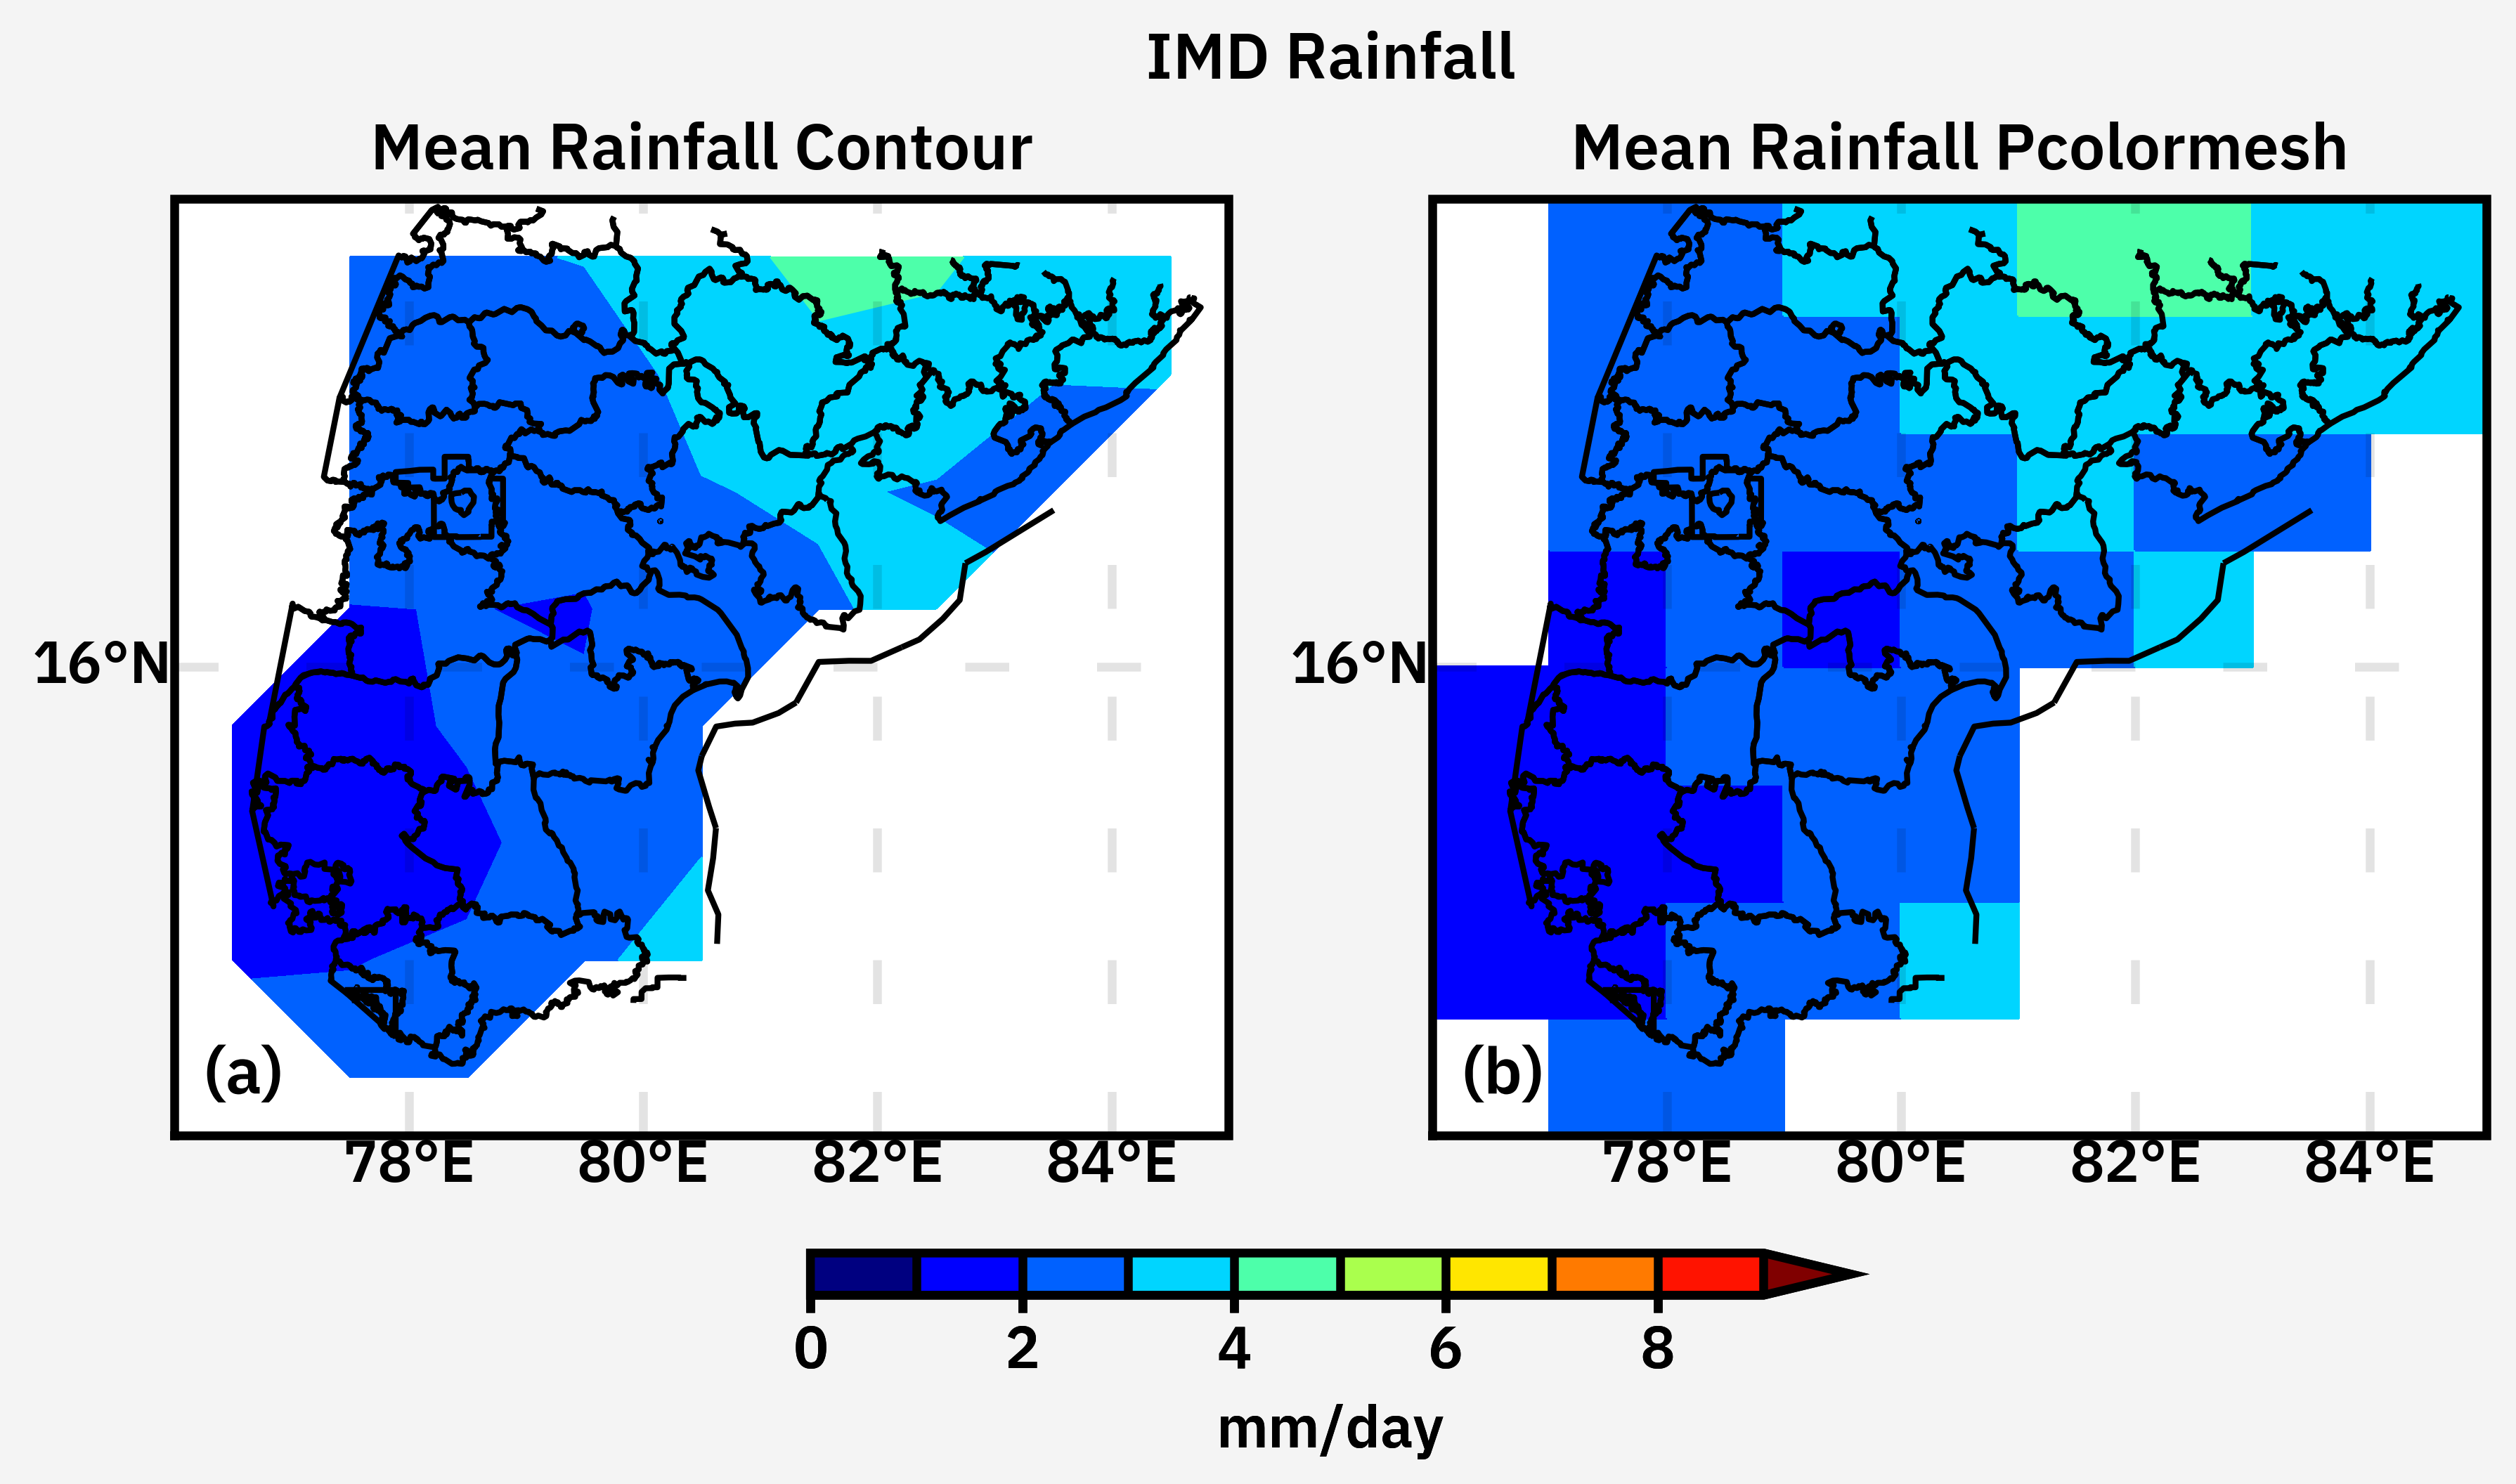

In [22]:
# Generate the figure and axis with nrows and ncols for subplots ###
fig, axs=plot.subplots(ncols=2,nrows=1, proj='cyl', dpi=300,
                       tight=True) 

##### proj = 'cyl' is the Cylindrical Equidistant Map projection used by Cartopy ###
#### dpi = 300 ( recommended ) , 600 , 1200 

lat_min = 12 # Change accordingly
lat_max = 20 # lat max
lon_min = 76 ###
lon_max = 85
levels=np.arange(0,10,1) # generates a sequence of numbers from 0 to 10 with  a spacing of 1
cm = 'Jet' # Colormap 'rainbow' , 'viridis', 'RdYlBu', 'RdBu' etc..
ex= 'max' # Color bar arrow ,'min', 'max', 'none','both'

#Now, we can format all the axes at once using these commands

axs.format(lonlim=(lon_min, lon_max), 
           latlim=(lat_min, lat_max), 
           labels=True,
           innerborders=False, 
           latlines=4, lonlines=2,
           abc='(a)', abcloc='ll', 
           gridminor=False,
           suptitle='IMD Rainfall' )

######## Limits as above; ### labels = True for lat lon labels,
###### inner borders = False , If True, it will show rivers #####
###latlines=1, lonlines=1  spacing ########
#abc=False, It abc='(a)', it will automatically give subplot (a),(b),(c) etc....
####abcloc='ll', abc location
#### gridminor=False; if true it will show all gridlines of lat , lon


###########Subplots ################ 

#contourf for contours

#pcolormesh for psuedo color plot

#Each subplot axis is numbered as axs[0] or axs[1] etc....]

# 1st subplot

m=axs[0].contourf(ds_clip,     # Data to be plotted
                    cmap=cm,  # Colormap
                  extend=ex, 
                 transform=ccrs.PlateCarree(), # cartopy map projection
                  levels=levels )


#### adding shapefile ######

axs[0].add_geometries(Reader(fname).geometries(),
                      ccrs.PlateCarree(),facecolor='None',edgecolor='black', 
                      linewidth=1)


axs[0].format(title='Mean Rainfall Contour')


# 2nd subplot

n=axs[1].pcolormesh(ds_clip,
                    cmap=cm,  
                    extend=ex, 
                    transform=ccrs.PlateCarree(), 
                    levels=levels )

#### adding shapefile ######
axs[1].add_geometries(Reader(fname).geometries(),
                      ccrs.PlateCarree(),facecolor='None',edgecolor='black', 
                      linewidth=1)




axs[1].format(title='Mean Rainfall Pcolormesh')

# Colorbar

fig.colorbar(m,loc='b',drawedges=True, width = 0.10 , length=0.45, label='mm/day')

#fig.colorbar will ive 1 common colorbar for all plots. But for common colorbar give explict levels.

#Use axs[0].colorbar for individual colorbars ########    

# axs[1].colorbar(n,loc='b',drawedges=True, width = 0.10 , length=0.65, label= 'Rainfall')
